# 📘 K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a **supervised learning** algorithm used for **classification** and **regression**. It classifies a new data point based on the majority class among its K closest neighbors.

---

## 🧠 Core Idea

Given a new data point, KNN:

1. Finds the **K closest** points in the training set using a distance metric.
2. For **classification**: Assigns the most common class.
3. For **regression**: Returns the average value.

---

## 🧮 Distance Calculation (Euclidean)

The most common distance metric:

$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}
$$

---

## 📊 Example (Classification)

Training data (2D):

- Red class: (1, 2), (2, 3), (3, 1)
- Blue class: (6, 5), (7, 7), (8, 6)

New point to classify: **(4, 3)**

### Distances:

- To (2,3):  √(2² + 0²) = 2.0 → Red  
- To (3,1):  √(1² + 2²) ≈ 2.24 → Red  
- To (6,5):  √(2² + 2²) ≈ 2.83 → Blue  

→ **Nearest 3 neighbors**: 2 Red, 1 Blue  
→ **Predicted Class: Red**

---

## ⚙️ Parameters to Tune

- **K**: Number of neighbors (small = sensitive to noise, large = smoother)
- **Distance metric**: Euclidean, Manhattan, cosine, etc.
- **Weighting**: Use inverse distance for weighting neighbors.

## ✅ Pros and ❌ Cons

| Pros                        | Cons                                |
|-----------------------------|-------------------------------------|
| Simple, intuitive           | Slow for large datasets             |
| No training time            | Requires feature scaling            |
| Adaptable to multiclass     | Sensitive to noisy/irrelevant data  |

---



## 🔁 Step-by-Step Example: KNN Classification (K=3)

We’ll classify a new point using **K=3** based on distance to training points.


#### 🧮 Step 0: Setup

**Training data:**

| Point      | Coordinates | Label |
|------------|-------------|-------|
| A          | (1, 2)      | Red   |
| B          | (2, 3)      | Red   |
| C          | (3, 1)      | Red   |
| D          | (6, 5)      | Blue  |
| E          | (7, 7)      | Blue  |
| F          | (8, 6)      | Blue  |

**New point to classify:**  
`x_new = (4, 3)`

We'll compute **Euclidean distance** from `x_new` to each training point.


#### 🧮 Step 1: Compute Distances

Euclidean distance formula:

$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}
$$

##### Distance to A (1, 2):

$$
d = \sqrt{(4-1)^2 + (3-2)^2} = \sqrt{9 + 1} = \sqrt{10} ≈ 3.16
$$

##### Distance to B (2, 3):

$$
d = \sqrt{(4-2)^2 + (3-3)^2} = \sqrt{4 + 0} = \sqrt{4} = 2.0
$$

##### Distance to C (3, 1):

$$
d = \sqrt{(4-3)^2 + (3-1)^2} = \sqrt{1 + 4} = \sqrt{5} ≈ 2.24
$$

##### Distance to D (6, 5):

$$
d = \sqrt{(4-6)^2 + (3-5)^2} = \sqrt{4 + 4} = \sqrt{8} ≈ 2.83
$$

##### Distance to E (7, 7):

$$
d = \sqrt{(4-7)^2 + (3-7)^2} = \sqrt{9 + 16} = \sqrt{25} = 5.0
$$

##### Distance to F (8, 6):

$$
d = \sqrt{(4-8)^2 + (3-6)^2} = \sqrt{16 + 9} = \sqrt{25} = 5.0
$$


#### 📊 Step 2: Sort Distances

| Point | Label | Distance |
|-------|-------|----------|
| B     | Red   | 2.00     |
| C     | Red   | 2.24     |
| D     | Blue  | 2.83     |
| A     | Red   | 3.16     |
| E     | Blue  | 5.00     |
| F     | Blue  | 5.00     |



#### ✅ Step 3: Select K Nearest Neighbors (K=3)

Top 3 points:

- **B** (Red)
- **C** (Red)
- **D** (Blue)



#### 🗳️ Step 4: Vote (Classification)

| Class | Count |
|-------|-------|
| Red   | 2     |
| Blue  | 1     |



#### 🏆 Step 5: Final Prediction

Since **Red has the majority**, we predict:

> **x_new = (4,3)** → **Predicted class: Red**



---
# 📘 K-Nearest Neighbors (KNN) Visualization

This notebook demonstrates:
- How KNN classifies a new point based on distance
- Visualization of the decision boundary for different values of **K**


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


In [7]:

# Training data
X_train = np.array([[1,2], [2,3], [3,1], [6,5], [7,7], [8,6]])
y_train = np.array([0, 0, 0, 1, 1, 1])  # 0=Red, 1=Blue

# New point to classify
x_new = np.array([[4,3]])


In [8]:

def plot_decision_boundary(k, X_train, y_train, x_new):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Meshgrid
    h = .2
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
    plt.scatter(x_new[0, 0], x_new[0, 1], c='green', marker='x', s=150, label='New Point')
    plt.title(f"KNN Decision Boundary (K={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid()
    plt.show()


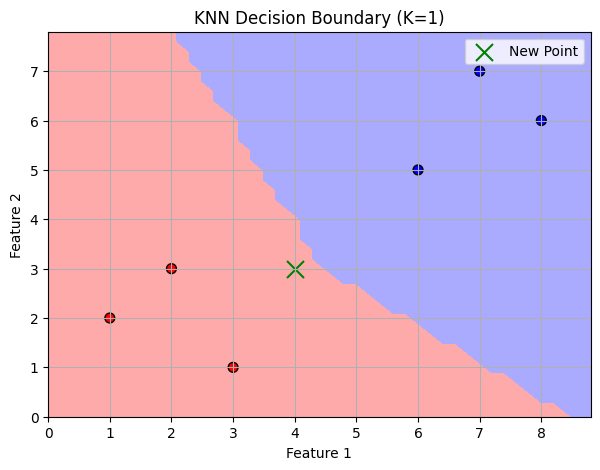

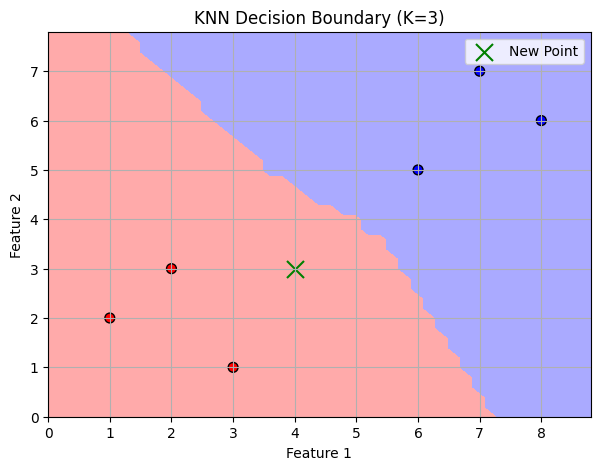

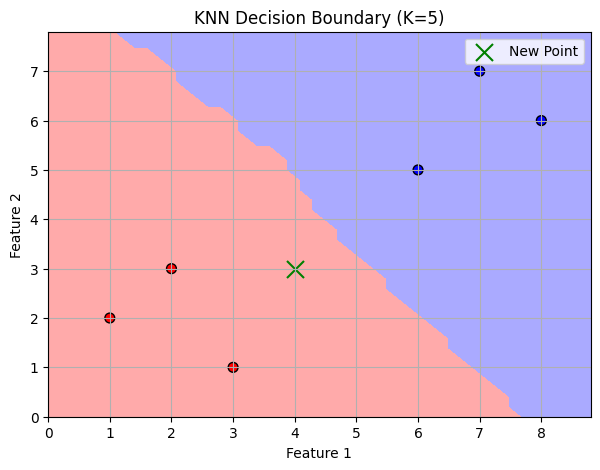

In [4]:

# Plot decision boundaries for K = 1, 3, 5
for k in [1, 3, 5]:
    plot_decision_boundary(k, X_train, y_train, x_new)


## 🔚 Conclusion

- **K-Nearest Neighbors (KNN)** is a simple, intuitive, and powerful algorithm for both classification and regression tasks.
- It works by considering the **K closest training examples** to make predictions, relying on distance metrics like Euclidean distance.
- KNN is **non-parametric** (no training phase), making it easy to implement but potentially slow at prediction time for large datasets.
- Performance is highly sensitive to:
  - The choice of **K** (too small → overfitting, too large → underfitting)
  - The **distance metric**
  - The **scale of features** (feature scaling is crucial)
- While KNN works well for **low-dimensional, clean datasets**, it struggles with:
  - **High-dimensional** spaces (curse of dimensionality)
  - **Imbalanced datasets**
  - **Irrelevant or noisy features**

**✅ Summary:**  
KNN is an excellent baseline model and a good educational tool to understand distance-based learning. With proper preprocessing and tuning, it can yield solid results in various domains.
